# Data Manipulation
This notebook aims to provide the general manipulation syntax used in python.
Contents are:
1. Reading data and Change column names
2. Pandas
3. Data summary with pandas profiling
4. Subsetting and filtering
5. Adding new columns
6. Summary statistics with group by
7. Basic plots

## Reading data

In [1]:
import pandas as pd
import numpy as np

In [37]:
credit_data_path = "C:/Users/shiha/OneDrive/Documents/Shihan Huang/Python Learning - GitHub/credit_card_data-headers.txt"
credit_data = pd.read_csv(credit_data_path, sep = "\t")

In [38]:
# Initial exploring 
credit_data.info() # shows the columns and their type
credit_data.shape # attribute rather than method
credit_data.describe() # summary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 11 columns):
A1     654 non-null int64
A2     654 non-null float64
A3     654 non-null float64
A8     654 non-null float64
A9     654 non-null int64
A10    654 non-null int64
A11    654 non-null int64
A12    654 non-null int64
A14    654 non-null int64
A15    654 non-null int64
R1     654 non-null int64
dtypes: float64(3), int64(8)
memory usage: 56.3 KB


,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,0.689602,31.578349,4.830558,2.241690,0.535168,0.561162,2.498471,0.538226,180.084098,1012.730887,0.452599
std,0.463010,11.981789,5.023295,3.369197,0.499143,0.496625,4.965655,0.498918,168.315719,5249.320660,0.498129
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.580000,1.040000,0.165000,0.000000,0.000000,0.000000,0.000000,70.750000,0.000000,0.000000
50%,1.000000,28.460000,2.855000,1.000000,1.000000,1.000000,0.000000,1.000000,160.000000,5.000000,0.000000
75%,1.000000,38.250000,7.437500,2.615000,1.000000,1.000000,3.000000,1.000000,271.000000,399.000000,1.000000
max,1.000000,80.250000,28.000000,28.500000,1.000000,1.000000,67.000000,1.000000,2000.000000,100000.000000,1.000000


In [39]:
print(credit_data.head()) # single column
type(credit_data) # checking the type of the object
# Add Column Name

   A1     A2     A3    A8  A9  A10  A11  A12  A14  A15  R1
0   1  30.83  0.000  1.25   1    0    1    1  202    0   1
1   0  58.67  4.460  3.04   1    0    6    1   43  560   1
2   0  24.50  0.500  1.50   1    1    0    1  280  824   1
3   1  27.83  1.540  3.75   1    0    5    0  100    3   1
4   1  20.17  5.625  1.71   1    1    0    1  120    0   1


pandas.core.frame.DataFrame

## Column Names

Change all columns:

credit_data.columns = ['A1',...,'R1'] 


Renaming - Option 1

In [40]:
# Rename:
credit_data.rename(columns = {"A1":"A1_test"}) # this does not save to the original dataset
print(credit_data.head())

credit_data = credit_data.rename(columns = {"A1":"A1_test"})
print(credit_data.head())

   A1     A2     A3    A8  A9  A10  A11  A12  A14  A15  R1
0   1  30.83  0.000  1.25   1    0    1    1  202    0   1
1   0  58.67  4.460  3.04   1    0    6    1   43  560   1
2   0  24.50  0.500  1.50   1    1    0    1  280  824   1
3   1  27.83  1.540  3.75   1    0    5    0  100    3   1
4   1  20.17  5.625  1.71   1    1    0    1  120    0   1
   A1_test     A2     A3    A8  A9  A10  A11  A12  A14  A15  R1
0        1  30.83  0.000  1.25   1    0    1    1  202    0   1
1        0  58.67  4.460  3.04   1    0    6    1   43  560   1
2        0  24.50  0.500  1.50   1    1    0    1  280  824   1
3        1  27.83  1.540  3.75   1    0    5    0  100    3   1
4        1  20.17  5.625  1.71   1    1    0    1  120    0   1


Renaming - Option 2 - Add string

In [41]:
# Add common strings to the column names
credit_data = credit_data.rename(columns = lambda x: x+'_s')
print(credit_data.head())

   A1_test_s   A2_s   A3_s  A8_s  A9_s  A10_s  A11_s  A12_s  A14_s  A15_s  \
0          1  30.83  0.000  1.25     1      0      1      1    202      0   
1          0  58.67  4.460  3.04     1      0      6      1     43    560   
2          0  24.50  0.500  1.50     1      1      0      1    280    824   
3          1  27.83  1.540  3.75     1      0      5      0    100      3   
4          1  20.17  5.625  1.71     1      1      0      1    120      0   

   R1_s  
0     1  
1     1  
2     1  
3     1  
4     1  


Renaming - Option 3 - when we know the location 

In [26]:
#credit_data.columns.values[0] = "A1_s" # this seems to be causing issues 
display(credit_data.head())

,A1_s,A2_s,A3_s,A8_s,A9_s,A10_s,A11_s,A12_s,A14_s,A15_s,R1_s
0,1,30.83,0.000,1.25,1,0,1,1,202,0,1
1,0,58.67,4.460,3.04,1,0,6,1,43,560,1
2,0,24.50,0.500,1.50,1,1,0,1,280,824,1
3,1,27.83,1.540,3.75,1,0,5,0,100,3,1
4,1,20.17,5.625,1.71,1,1,0,1,120,0,1


In [42]:
# look at the column names 
credit_data.columns.values

array(['A1_test_s', 'A2_s', 'A3_s', 'A8_s', 'A9_s', 'A10_s', 'A11_s',
       'A12_s', 'A14_s', 'A15_s', 'R1_s'], dtype=object)

In [43]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 11 columns):
A1_test_s    654 non-null int64
A2_s         654 non-null float64
A3_s         654 non-null float64
A8_s         654 non-null float64
A9_s         654 non-null int64
A10_s        654 non-null int64
A11_s        654 non-null int64
A12_s        654 non-null int64
A14_s        654 non-null int64
A15_s        654 non-null int64
R1_s         654 non-null int64
dtypes: float64(3), int64(8)
memory usage: 56.3 KB


## Pandas
Pandas = numpy + matplotlib
Pandas deals with rectangular data and present data in DataFrames:
* Same column has same type
* Different columns can have different types


In [44]:
# Exploring
credit_data.values # data values in array

array([[1.000e+00, 3.083e+01, 0.000e+00, ..., 2.020e+02, 0.000e+00,
        1.000e+00],
       [0.000e+00, 5.867e+01, 4.460e+00, ..., 4.300e+01, 5.600e+02,
        1.000e+00],
       [0.000e+00, 2.450e+01, 5.000e-01, ..., 2.800e+02, 8.240e+02,
        1.000e+00],
       ...,
       [0.000e+00, 2.525e+01, 1.350e+01, ..., 2.000e+02, 1.000e+00,
        0.000e+00],
       [1.000e+00, 1.792e+01, 2.050e-01, ..., 2.800e+02, 7.500e+02,
        0.000e+00],
       [1.000e+00, 3.500e+01, 3.375e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [45]:
credit_data.columns # column names

Index(['A1_test_s', 'A2_s', 'A3_s', 'A8_s', 'A9_s', 'A10_s', 'A11_s', 'A12_s',
       'A14_s', 'A15_s', 'R1_s'],
      dtype='object')

In [46]:
credit_data.index # row numbers

RangeIndex(start=0, stop=654, step=1)

# Sorting and Subsetting

In [48]:
credit_data.sort_values("R1_s", ascending=False)
# can also sort by multiple 
credit_data.sort_values(["R1_s","A1_test_s"], ascending=[False,True])

,A1_test_s,A2_s,A3_s,A8_s,A9_s,A10_s,A11_s,A12_s,A14_s,A15_s,R1_s
1,0,58.67,4.460,3.040,1,0,6,1,43,560,1
2,0,24.50,0.500,1.500,1,1,0,1,280,824,1
7,0,22.92,11.585,0.040,1,1,0,1,80,1349,1
12,0,38.25,6.000,1.000,1,1,0,0,0,0,1
14,0,45.83,10.500,5.000,1,0,7,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
647,1,36.42,0.750,0.585,0,1,0,1,240,3,0
648,1,40.58,3.290,3.500,0,1,0,0,400,0,0
649,1,21.08,10.085,1.250,0,1,0,1,260,0,0
652,1,17.92,0.205,0.040,0,1,0,1,280,750,0


In [49]:
# choose one column to look at
credit_data["R1_s"]

0      1
1      1
2      1
3      1
4      1
      ..
649    0
650    0
651    0
652    0
653    0
Name: R1_s, Length: 654, dtype: int64

In [50]:
# choose two columns
credit_data[["R1_s","A1_test_s"]]

,R1_s,A1_test_s
0,1,1
1,1,0
2,1,0
3,1,1
4,1,1
...,...,...
649,0,1
650,0,0
651,0,0
652,0,1


In [53]:
# Subsetting rows
credit_data[credit_data["R1_s"] > 0]
# give "boolean" when subsetting 

,A1_test_s,A2_s,A3_s,A8_s,A9_s,A10_s,A11_s,A12_s,A14_s,A15_s,R1_s
0,1,30.83,0.000,1.25,1,0,1,1,202,0,1
1,0,58.67,4.460,3.04,1,0,6,1,43,560,1
2,0,24.50,0.500,1.50,1,1,0,1,280,824,1
3,1,27.83,1.540,3.75,1,0,5,0,100,3,1
4,1,20.17,5.625,1.71,1,1,0,1,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...
568,0,21.50,6.000,2.50,1,0,3,1,80,918,1
569,1,20.50,2.415,2.00,1,0,11,0,200,3000,1
570,0,29.50,0.460,0.54,1,0,4,1,380,500,1
575,1,16.17,0.040,0.04,0,1,0,1,0,0,1


In [58]:
a2_gt_3 = credit_data["A2_s"] > 40
credit_data[a2_gt_3]

,A1_test_s,A2_s,A3_s,A8_s,A9_s,A10_s,A11_s,A12_s,A14_s,A15_s,R1_s
1,0,58.67,4.460,3.040,1,0,6,1,43,560,1
8,1,54.42,0.500,3.960,1,1,0,1,180,314,1
9,1,42.50,4.915,3.165,1,1,0,0,52,1442,1
13,1,48.08,6.040,0.040,0,1,0,1,0,2690,1
14,0,45.83,10.500,5.000,1,0,7,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
634,1,51.83,2.040,1.500,0,1,0,1,120,1,0
635,1,47.17,5.835,5.500,0,1,0,1,465,150,0
637,0,50.25,0.835,0.500,0,1,0,0,240,117,0
639,0,41.58,1.040,0.665,0,1,0,1,240,237,0


In [60]:
a2_s_40_60 = credit_data["A2_s"].isin([40,60])
credit_data[a2_s_40_60]

,A1_test_s,A2_s,A3_s,A8_s,A9_s,A10_s,A11_s,A12_s,A14_s,A15_s,R1_s
181,1,40.0,6.5,3.5,1,0,1,1,0,500,1


In [63]:
# double conditions
credit_data[(credit_data["A2_s"]>60) & (credit_data["R1_s"]==1)]

,A1_test_s,A2_s,A3_s,A8_s,A9_s,A10_s,A11_s,A12_s,A14_s,A15_s,R1_s
125,1,67.75,5.500,13.00,1,0,1,0,0,0,1
152,0,68.67,15.000,0.00,1,0,14,1,0,3376,1
159,0,60.58,16.500,11.00,1,1,0,0,21,10561,1
205,1,60.08,14.500,18.00,1,0,15,0,0,1000,1
214,1,65.42,11.000,20.00,1,0,7,0,22,0,1
476,0,64.08,0.165,0.00,1,0,1,1,232,100,1
489,0,60.92,5.000,4.00,1,0,4,1,0,99,1
522,1,76.75,22.290,12.75,1,0,1,0,0,109,1
545,0,65.17,14.000,0.00,1,0,11,0,0,1400,1
557,1,73.42,17.750,0.00,1,1,0,0,0,0,1


## New Columns

In [64]:
credit_data["R1_s_add1"] = credit_data["R1_s"] + 1
display(credit_data)

,A1_test_s,A2_s,A3_s,A8_s,A9_s,A10_s,A11_s,A12_s,A14_s,A15_s,R1_s,R1_s_add1
0,1,30.83,0.000,1.25,1,0,1,1,202,0,1,2
1,0,58.67,4.460,3.04,1,0,6,1,43,560,1,2
2,0,24.50,0.500,1.50,1,1,0,1,280,824,1,2
3,1,27.83,1.540,3.75,1,0,5,0,100,3,1,2
4,1,20.17,5.625,1.71,1,1,0,1,120,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
649,1,21.08,10.085,1.25,0,1,0,1,260,0,0,1
650,0,22.67,0.750,2.00,0,0,2,0,200,394,0,1
651,0,25.25,13.500,2.00,0,0,1,0,200,1,0,1
652,1,17.92,0.205,0.04,0,1,0,1,280,750,0,1


## Summary Statistics

In [65]:
credit_data["R1_s"].mean()
# .mode()
# .median()
# .min() / .max()
# .var() / .std()
# .sum()


0.4525993883792049

In [66]:
# .agg()

def pct40(column):
    return column.quantile(0.4)
def pct30(column):
    return column.quantile(0.3)

credit_data["A2_s"].agg(pct30)

23.25

In [68]:
credit_data["A2_s"].agg([pct30,pct40])

pct30    23.250
pct40    25.436
Name: A2_s, dtype: float64

In [70]:
# cumulative sum
credit_data["A2_s"].cumsum()
# .cummax
# .cummin
# .cumprod


0         30.83
1         89.50
2        114.00
3        141.83
4        162.00
         ...   
649    20551.40
650    20574.07
651    20599.32
652    20617.24
653    20652.24
Name: A2_s, Length: 654, dtype: float64

In [74]:
# Counting - avoid double counting 
credit_data["R1_s"].value_counts()

# data.drop_duplicates(subset="column")

0    358
1    296
Name: R1_s, dtype: int64

In [76]:
credit_data["R1_s"].value_counts(normalize=True, sort= True)

0    0.547401
1    0.452599
Name: R1_s, dtype: float64

## Groupped Summary Statistics

In [77]:
credit_data.groupby("A2_s")["R1_s"].mean()

A2_s
13.75    1.0
15.17    0.0
15.75    0.0
15.83    0.5
15.92    0.0
        ... 
69.50    0.0
73.42    1.0
74.83    0.0
76.75    1.0
80.25    0.0
Name: R1_s, Length: 341, dtype: float64

In [80]:
credit_data.groupby("A2_s")["R1_s"].agg([min,max,sum])
# can also group by multiple columns - feed as list
credit_data.groupby(["A2_s","A8_s"])[["R1_s","A9_s"]].agg([min,max,sum])

R1_s         A9_s        
              min max sum  min max sum
A2_s  A8_s                            
13.75 1.750     1   1   1    1   1   1
15.17 1.000     0   0   0    0   0   0
15.75 1.000     0   0   0    0   0   0
15.83 0.125     0   0   0    0   0   0
      1.500     1   1   1    1   1   1
...           ...  ..  ..  ...  ..  ..
69.50 0.000     0   0   0    0   0   0
73.42 0.000     1   1   1    1   1   1
74.83 0.040     0   0   0    0   0   0
76.75 12.750    1   1   1    1   1   1
80.25 0.540     0   0   0    1   1   1

[641 rows x 6 columns]

## Pivot Tables

In [83]:
credit_data.pivot_table(values = "R1_s" # the column to summarise
                       ,index = "A2_s") # group
# by default, it shows the mean 

,R1_s
A2_s,
13.75,1.0
15.17,0.0
15.75,0.0
15.83,0.5
15.92,0.0
...,...
69.50,0.0
73.42,1.0
74.83,0.0


In [85]:
credit_data.pivot_table(values = "R1_s" # the column to summarise
                       ,index = "A2_s"
                       ,aggfunc = [np.mean,np.median]) # group

,mean,median
,R1_s,R1_s
A2_s,,
13.75,1.0,1.0
15.17,0.0,0.0
15.75,0.0,0.0
15.83,0.5,0.5
15.92,0.0,0.0
...,...,...
69.50,0.0,0.0
73.42,1.0,1.0


In [88]:
# add columns
credit_data.pivot_table(values = "R1_s" # the column to summarise
                        ,index = "A2_s"
                        ,columns = "A8_s"
                        ,fill_value = 0 # fill in NAN's with zero 
                    ) # group
# can also add "margins = True"

A8_s,0.000,0.040,0.085,0.125,0.165,0.210,0.250,0.290,0.335,0.375,...,13.875,14.000,14.415,15.000,15.500,16.000,17.500,18.000,20.000,28.500
A2_s,,,,,,,,,,,,,,,,,,,,,
13.75,0.0,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.17,0.0,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.75,0.0,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.83,0.0,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.92,0.0,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69.50,0.0,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73.42,1.0,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74.83,0.0,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Indexing 

set index - basically using a column to become the row name

df.set_index("column")

or reset index: df.reset_index()

df.reset_index(drop = True)


for locating purpose

df.loc[["row1","row2"]]

index doesn't need to be unique, but can also do multiple columns

can also sort by index - df.sort_index()


In [90]:
# # Index temperatures by country & city
# temperatures_ind = temperatures.set_index(["country","city"])

# # List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
# rows_to_keep = [("Brazil","Rio De Janeiro"),("Pakistan","Lahore")]

# Subset for rows to keep
# print(temperatures_ind.loc[rows_to_keep])

# # Sort temperatures_ind by index values
# print(temperatures_ind.sort_index())

# # Sort temperatures_ind by index values at the city level
# print(temperatures_ind.sort_index(level = "city"))

# # Sort temperatures_ind by country then descending city
# print(temperatures_ind.sort_index(level = ["country","city"], ascending = [True,False]))

# Slicing

In [93]:
# can slice list and data frames
print(credit_data[0:2]) # first row and second row using index
print(credit_data.iloc[0:2, 1:3])

   A1_test_s   A2_s  A3_s  A8_s  A9_s  A10_s  A11_s  A12_s  A14_s  A15_s  \
0          1  30.83  0.00  1.25     1      0      1      1    202      0   
1          0  58.67  4.46  3.04     1      0      6      1     43    560   

   R1_s  R1_s_add1  
0     1          2  
1     1          2  
    A2_s  A3_s
0  30.83  0.00
1  58.67  4.46


Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India","Hyderabad"):("Iraq","Baghdad")])

Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,"date":"avg_temp_c"])

Subset in both directions at once
print(temperatures_srt.loc[("India","Hyderabad"):("Iraq","Baghdad"),"date":"avg_temp_c"])

Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)

Set date as an index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08-01":"2011-02-28"])


Using iloc!
Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

Use slicing to get the first 5 rows
print(temperatures.iloc[0:5,])

Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

Use slicing in both directions at once
print(temperatures.iloc[0:5,2:4])


# Pivot Table and Slicing

dogs_height_by_breed_vs_color.mean(axis = "columns") 

Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values = "avg_temp_c", index = ["country","city"],columns = "year")

See the result
print(temp_by_country_city_vs_year)



Subset for Egypt to Indt
temp_by_country_city_vs_year.loc["Egypt":"India"]

Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[("Egypt","Cairo"):("India","Delhi")]

Subset in both directions at once
temp_by_country_city_vs_year.loc[("Egypt","Cairo"):("India","Delhi"),"2005":"2010"]

Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean(axis = "index")
print(mean_temp_by_year)
Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max() ])

Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis = "columns")

Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

# Visualisation

In [94]:
import matplotlib.pyplot as plt

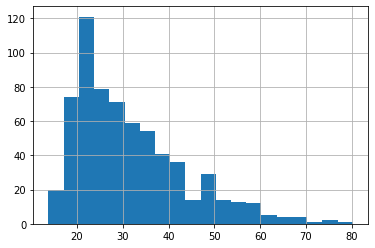

In [98]:
# Histogram
credit_data["A2_s"].hist(bins = 20)
plt.show()

R1_s
0    29.703855
1    33.845473
Name: A2_s, dtype: float64


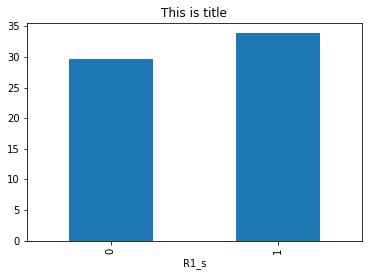

In [101]:
# Bar Plots
credit_data_grouped = credit_data.groupby("R1_s")["A2_s"].mean()
print(credit_data_grouped)
credit_data_grouped.plot(kind = "bar"
                        ,title = "This is title")
plt.show()

In [104]:
# Line plot
credit_data.head()

,A1_test_s,A2_s,A3_s,A8_s,A9_s,A10_s,A11_s,A12_s,A14_s,A15_s,R1_s,R1_s_add1
0,1,30.83,0.000,1.25,1,0,1,1,202,0,1,2
1,0,58.67,4.460,3.04,1,0,6,1,43,560,1,2
2,0,24.50,0.500,1.50,1,1,0,1,280,824,1,2
3,1,27.83,1.540,3.75,1,0,5,0,100,3,1,2
4,1,20.17,5.625,1.71,1,1,0,1,120,0,1,2


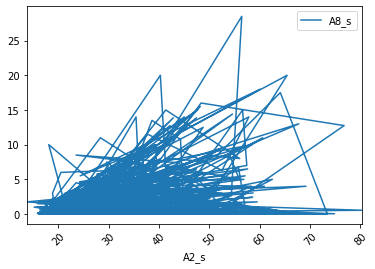

In [107]:
credit_data.plot(x = "A2_s"
                ,y = "A8_s"
                ,kind = "line"
                ,rot = 45 ) # rotating labels
plt.show()

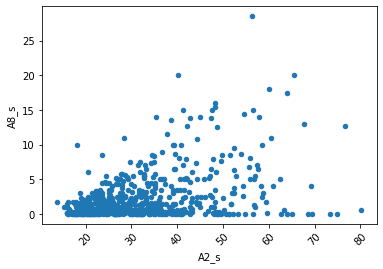

In [108]:
credit_data.plot(x = "A2_s"
                ,y = "A8_s"
                ,kind = "scatter"
                ,rot = 45 ) # rotating labels
plt.show()

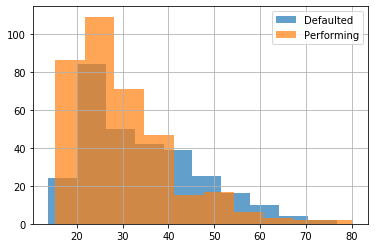

In [112]:
# Stacking histogram - by group
credit_data[credit_data["R1_s"]==1]["A2_s"].hist(alpha = 0.7)
# alpha -> trasparency
credit_data[credit_data["R1_s"]==0]["A2_s"].hist(alpha = 0.7)
plt.legend(["Defaulted","Performing"])
plt.show()

Exercise~

Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

Look at the first few rows of data
print(avocados.head())

Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

Show the plot
plt.show()

## Missing Values

In [115]:
# "NaN" means missing
credit_data.isna().any()
# shows if there's anything missing in the column

A1_test_s    False
A2_s         False
A3_s         False
A8_s         False
A9_s         False
A10_s        False
A11_s        False
A12_s        False
A14_s        False
A15_s        False
R1_s         False
R1_s_add1    False
dtype: bool

In [117]:
credit_data.isna().sum()

A1_test_s    0
A2_s         0
A3_s         0
A8_s         0
A9_s         0
A10_s        0
A11_s        0
A12_s        0
A14_s        0
A15_s        0
R1_s         0
R1_s_add1    0
dtype: int64

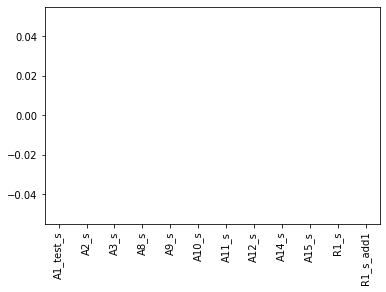

In [118]:
credit_data.isna().sum().plot(kind="bar")
plt.show()

In [119]:
# can drop rows with na values
credit_data.dropna()

,A1_test_s,A2_s,A3_s,A8_s,A9_s,A10_s,A11_s,A12_s,A14_s,A15_s,R1_s,R1_s_add1
0,1,30.83,0.000,1.25,1,0,1,1,202,0,1,2
1,0,58.67,4.460,3.04,1,0,6,1,43,560,1,2
2,0,24.50,0.500,1.50,1,1,0,1,280,824,1,2
3,1,27.83,1.540,3.75,1,0,5,0,100,3,1,2
4,1,20.17,5.625,1.71,1,1,0,1,120,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
649,1,21.08,10.085,1.25,0,1,0,1,260,0,0,1
650,0,22.67,0.750,2.00,0,0,2,0,200,394,0,1
651,0,25.25,13.500,2.00,0,0,1,0,200,1,0,1
652,1,17.92,0.205,0.04,0,1,0,1,280,750,0,1


fill NA
credit_data.fillna(0)

From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist()
plt.show()

Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

Show the plot
plt.show()

## Creating Data Frames

In [122]:
# Dictionary
my_dict = {
    "title":"Book 1"
    ,"Author":"Author 1"
}
print(my_dict)

{'title': 'Book 1', 'Author': 'Author 1'}


In [126]:
# from a list of dictionaries - row by row
list_of_dict = [
    {"name":"Ginger", "breed":"Dachshund", "age":2}
    ,{"name":"Scout", "breed":"Dalmatian", "age":3}
]
new_dogs = pd.DataFrame(list_of_dict)

new_dogs.head()

,name,breed,age
0,Ginger,Dachshund,2
1,Scout,Dalmatian,3


In [127]:
# from a dictionary of list - column by column
dict_of_lists = {
    "name" : ["Ginger","Scout"]
    ,"bredd" :["Dachshund", "Dalmatian"]
    ,"age":[2,3]
}
new_dogs = pd.DataFrame(dict_of_lists)
new_dogs.head()

,name,bredd,age
0,Ginger,Dachshund,2
1,Scout,Dalmatian,3


## Writing to CSV

In [128]:
# credit_data.to_csv("data.csv")